# 5 Scientific Software Engineering

<div id="toc"></div>

## 5.1 Implementations with Functions and Modules

### 5.1.1 Mathematical Problem and Solution Technique

### 5.1.2 A First, Quick Implementation

In [25]:
%matplotlib inline

Norm of the error: 6.794E-01


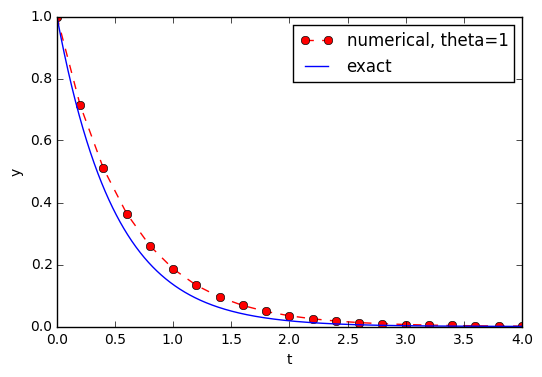

In [26]:
from numpy import *
from matplotlib.pyplot import *
A = 1
a = 2
T = 4
dt = 0.2
N = int(round(T / dt))
y = zeros(N + 1)
t = linspace(0, T, N + 1)
theta = 1
y[0] = A
for n in range(0, N):
    y[n + 1] = (1 - (1 - theta) * a * dt) / (1 + theta * dt * a) * y[n]
y_e = A * exp(-a * t) - y
error = y_e - y
E = sqrt(dt * sum(error ** 2))
print 'Norm of the error: %.3E' % E
plot(t, y, 'r--o')
t_e = linspace(0, T, 1001)
y_e = A * exp(-a * t_e)
plot(t_e, y_e, 'b-')
legend(['numerical, theta=%g' % theta, 'exact'])
xlabel('t')
ylabel('y')
show()

### 5.1.3 A More Decent Program

Norm of the error: 6.794E-01


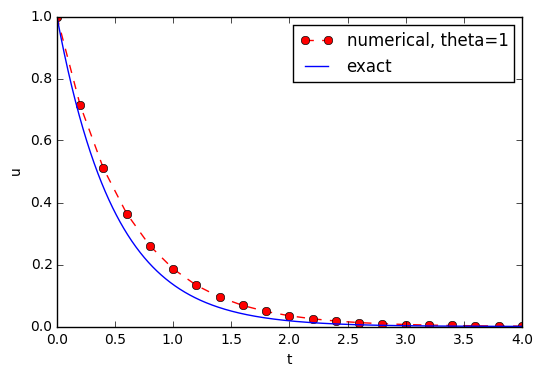

In [27]:
from numpy import *
from matplotlib.pyplot import *
I = 1
a = 2
T = 4
dt = 0.2
Nt = int(round(T / dt))# no of time intervals
u = zeros(Nt + 1)# array of u[n] values
t = linspace(0, T, Nt + 1)# time mesh
theta = 1# Backward Euler method
u[0] = I# assign initial condition

#n = 0, 1, ..., Nt - 1
for n in range(0, Nt):
    u[n + 1] = (1 - (1 - theta) * a * dt) / (1 + theta * dt * a) * u[n]# Compute norm of the error
    
u_e = I * exp(-a * t) - u # exact u at the mesh points
error = u_e - u
E = sqrt(dt * sum(error ** 2))
print 'Norm of the error: %.3E' % E# Compare numerical(u) and exact solution(u_e) in a plot
plot(t, u, 'r--o')
t_e = linspace(0, T, 1001)# very fine mesh
u_e = I * exp(-a * t_e)
plot(t_e, u_e, 'b-')
legend(['numerical, theta=%g' % theta, 'exact'])
xlabel('t')
ylabel('u')
show()

### 5.1.4 Prefixing Imported Functions by the Module Name

### 5.1.5 Implementing the Numerical Algorithm in a Function

In [28]:
def solver(I, a, T, dt, theta):
    """Solve u’=-a*u, u(0)=I, for t in (0,T] with steps of dt."""
    dt = float(dt) # avoid integer division
    Nt = int(round(T/dt)) # no of time intervals
    T = Nt*dt # adjust T to fit time step dt
    u = np. zeros(Nt+1) # array of u[n] values
    t = np. linspace(0, T, Nt+1) # time mesh
    u[0] = I # assign initial condition
    for n in range(0, Nt): # n=0,1,...,Nt-1
        u[n+1] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)*u[n]
    return u, t

In [29]:
u, t = solver(I=1, a=2, T=4, dt=0.2, theta=0.5)

In [30]:
u

array([  1.00000000e+00,   6.66666667e-01,   4.44444444e-01,
         2.96296296e-01,   1.97530864e-01,   1.31687243e-01,
         8.77914952e-02,   5.85276635e-02,   3.90184423e-02,
         2.60122949e-02,   1.73415299e-02,   1.15610199e-02,
         7.70734663e-03,   5.13823109e-03,   3.42548739e-03,
         2.28365826e-03,   1.52243884e-03,   1.01495923e-03,
         6.76639485e-04,   4.51092990e-04,   3.00728660e-04])

In [31]:
t

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ])

### 5.1.6 Do not Have Several Versions of a Code

### 5.1.7 Making a Module

In [32]:
def hello(arg='World!'):
    print 'Hello, ' + arg
if __name__ == '__main__' :
    hello()

Hello, World!


In [33]:
def hello(arg='World!' ):
    print 'Hello, ' + arg
hello()

Hello, World!


In [34]:
# %load softeng/decay.py
import numpy as np
import matplotlib.pyplot as plt

def solver(I, a, T, dt, theta):
    """Solve u'=-a*u, u(0)=I, for t in (0,T] with steps of dt."""
    dt = float(dt)               # avoid integer division
    Nt = int(round(T/dt))        # no of time intervals
    T = Nt*dt                    # adjust T to fit time step dt
    u = np.zeros(Nt+1)           # array of u[n] values
    t = np.linspace(0, T, Nt+1)  # time mesh

    u[0] = I                  # assign initial condition
    for n in range(0, Nt):    # n=0,1,...,Nt-1
        u[n+1] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)*u[n]
    return u, t

def u_exact(t, I, a):
    return I*np.exp(-a*t)

def experiment_print_error():
    I = 1;  a = 2;  T = 4;  dt = 0.4;  theta = 1
    u, t = solver(I, a, T, dt, theta)

    t_e = np.linspace(0, T, 1001)       # very fine mesh for u_e
    u_e = u_exact(t_e, I, a)
    eror = u_exact(t, I, a) - u
    E = np.sqrt(dt*np.sum(eror**2))
    print 'Error:', E

def experiment_compare_numerical_and_exact():
    I = 1;  a = 2;  T = 4;  dt = 0.4;  theta = 1
    u, t = solver(I, a, T, dt, theta)

    t_e = np.linspace(0, T, 1001)       # very fine mesh for u_e
    u_e = u_exact(t_e, I, a)

    plt.plot(t,   u,   'r--o')
    plt.plot(t_e, u_e, 'b-')
    plt.legend(['numerical, theta=%g' % theta, 'exact'])
    plt.xlabel('t')
    plt.ylabel('u')
    plotfile = 'tmp'
    plt.savefig(plotfile + '.png');  plt.savefig(plotfile + '.pdf')

    error = u_exact(t, I, a) - u
    E = np.sqrt(dt*np.sum(error**2))
    print 'Error:', E

def experiment_compare_schemes():
    """Compare theta=0,1,0.5 in the same plot."""
    I = 1;  a = 2;  T = 4;  dt = 0.4
    legends = []
    for theta in [0, 1, 0.5]:
        u, t = solver(I, a, T, dt, theta)
        plt.plot(t, u, '--o')
        legends.append('theta=%g' % theta)
    t_e = np.linspace(0, T, 1001)        # very fine mesh for u_e
    u_e = u_exact(t_e, I, a)
    plt.plot(t_e, u_e, 'b-')
    legends.append('exact')
    plt.legend(legends, loc='upper right')
    plotfile = 'tmp'
    plt.savefig(plotfile + '.png');  plt.savefig(plotfile + '.pdf')

import logging
# Define a default logger that does nothing
logging.getLogger('decay').addHandler(logging.NullHandler())

def solver_with_logging(I, a, T, dt, theta):
    """Solve u'=-a*u, u(0)=I, for t in (0,T] with steps of dt."""
    dt = float(dt)               # avoid integer division
    Nt = int(round(T/dt))        # no of time intervals
    T = Nt*dt                    # adjust T to fit time step dt
    u = np.zeros(Nt+1)           # array of u[n] values
    t = np.linspace(0, T, Nt+1)  # time mesh
    logging.debug('solver: dt=%g, Nt=%g, T=%g' % (dt, Nt, T))

    u[0] = I                  # assign initial condition
    for n in range(0, Nt):    # n=0,1,...,Nt-1
        u[n+1] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)*u[n]

        logging.info('u[%d]=%g' % (n, u[n]))
        logging.debug('1 - (1-theta)*a*dt: %g, %s' %
                      (1-(1-theta)*a*dt,
                       str(type(1-(1-theta)*a*dt))[7:-2]))
        logging.debug('1 + theta*dt*a: %g, %s' %
                      (1 + theta*dt*a,
                       str(type(1 + theta*dt*a))[7:-2]))
    return u, t

def configure_basic_logger():
    logging.basicConfig(
        filename='decay.log', filemode='w', level=logging.DEBUG,
        format='%(asctime)s - %(levelname)s - %(message)s',
        datefmt='%Y.%m.%d %I:%M:%S %p')

import sys

def read_command_line_positional():
    if len(sys.argv) < 6:
        print 'Usage: %s I a T on/off BE/FE/CN dt1 dt2 dt3 ...' % \
              sys.argv[0]; sys.exit(1)  # abort

    I = float(sys.argv[1])
    a = float(sys.argv[2])
    T = float(sys.argv[3])

    # Name of schemes: BE (Backward Euler), FE (Forward Euler),
    # CN (Crank-Nicolson)
    scheme = sys.argv[4]
    scheme2theta = {'BE': 1, 'CN': 0.5, 'FE': 0}
    if scheme in scheme2theta:
        theta = scheme2theta[scheme]
    else:
        print 'Invalid scheme name:', scheme; sys.exit(1)

    dt_values = [float(arg) for arg in sys.argv[5:]]

    return I, a, T, theta, dt_values

def define_command_line_options():
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument(
        '--I', '--initial_condition', type=float,
        default=1.0, help='initial condition, u(0)',
        metavar='I')
    parser.add_argument(
        '--a', type=float, default=1.0,
        help='coefficient in ODE', metavar='a')
    parser.add_argument(
        '--T', '--stop_time', type=float,
        default=1.0, help='end time of simulation',
        metavar='T')
    parser.add_argument(
        '--scheme', type=str, default='CN',
        help='FE, BE, or CN')
    parser.add_argument(
        '--dt', '--time_step_values', type=float,
        default=[1.0], help='time step values',
        metavar='dt', nargs='+', dest='dt_values')
    return parser

def read_command_line_argparse():
    parser = define_command_line_options()
    args = parser.parse_args()
    scheme2theta = {'BE': 1, 'CN': 0.5, 'FE': 0}
    data = (args.I, args.a, args.T, scheme2theta[args.scheme],
            args.dt_values)
    return data

def experiment_compare_dt(option_value_pairs=False):
    I, a, T, theta, dt_values = \
       read_command_line_argparse() if option_value_pairs else \
       read_command_line_positional()

    legends = []
    for dt in dt_values:
        u, t = solver(I, a, T, dt, theta)
        plt.plot(t, u)
        legends.append('dt=%g' % dt)
    t_e = np.linspace(0, T, 1001)       # very fine mesh for u_e
    u_e = u_exact(t_e, I, a)
    plt.plot(t_e, u_e, '--')
    legends.append('exact')
    plt.legend(legends, loc='upper right')
    plt.title('theta=%g' % theta)
    plotfile = 'tmp'
    plt.savefig(plotfile + '.png');  plt.savefig(plotfile + '.pdf')

def compute4web(I, a, T, dt, theta=0.5):
    """
    Run a case with the solver, compute error measure,
    and plot the numerical and exact solutions in a PNG
    plot whose data are embedded in an HTML image tag.
    """
    u, t = solver(I, a, T, dt, theta)
    u_e = u_exact(t, I, a)
    e = u_e - u
    E = np.sqrt(dt*np.sum(e**2))

    plt.figure()
    t_e = np.linspace(0, T, 1001)    # fine mesh for u_e
    u_e = u_exact(t_e, I, a)
    plt.plot(t,   u,   'r--o')
    plt.plot(t_e, u_e, 'b-')
    plt.legend(['numerical', 'exact'])
    plt.xlabel('t')
    plt.ylabel('u')
    plt.title('theta=%g, dt=%g' % (theta, dt))
    # Save plot to HTML img tag with PNG code as embedded data
    from parampool.utils import save_png_to_str
    html_text = save_png_to_str(plt, plotwidth=400)

    return E, html_text

def main_GUI(I=1.0, a=.2, T=4.0,
             dt_values=[1.25, 0.75, 0.5, 0.1],
             theta_values=[0, 0.5, 1]):
    # Build HTML code for web page. Arrange plots in columns
    # corresponding to the theta values, with dt down the rows
    theta2name = {0: 'FE', 1: 'BE', 0.5: 'CN'}
    html_text = '<table>\n'
    for dt in dt_values:
        html_text += '<tr>\n'
        for theta in theta_values:
            E, html = compute4web(I, a, T, dt, theta)
            html_text += """
<td>
<center><b>%s, dt=%g, error: %.3E</b></center><br>
%s
</td>
""" % (theta2name[theta], dt, E, html)
        html_text += '</tr>\n'
    html_text += '</table>\n'
    return html_text

def solver_with_doctest(I, a, T, dt, theta):
    """
    Solve u'=-a*u, u(0)=I, for t in (0,T] with steps of dt.


    >>> u, t = solver(I=0.8, a=1.2, T=1.5, dt=0.5, theta=0.5)
    >>> for n in range(len(t)):
    ...     print 't=%.1f, u=%.14f' % (t[n], u[n])
    t=0.0, u=0.80000000000000
    t=0.5, u=0.43076923076923
    t=1.0, u=0.23195266272189
    t=1.5, u=0.12489758761948
    """
    dt = float(dt)               # avoid integer division
    Nt = int(round(T/dt))        # no of time intervals
    T = Nt*dt                    # adjust T to fit time step dt
    u = np.zeros(Nt+1)           # array of u[n] values
    t = np.linspace(0, T, Nt+1)  # time mesh

    u[0] = I                  # assign initial condition
    for n in range(0, Nt):    # n=0,1,...,Nt-1
        u[n+1] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)*u[n]
    return u, t

def third(x):
    return x/3.

def test_third():
    x = 0.15
    expected = (1/3.)*x
    computed = third(x)
    tol = 1E-15
    success = abs(expected - computed) < tol
    assert success

def u_discrete_exact(n, I, a, theta, dt):
    """Return exact discrete solution of the numerical schemes."""
    dt = float(dt)  # avoid integer division
    A = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)
    return I*A**n

def test_u_discrete_exact():
    """Check that solver reproduces the exact discr. sol."""
    theta = 0.8; a = 2; I = 0.1; dt = 0.8
    Nt = int(8/dt)  # no of steps
    u, t = solver(I=I, a=a, T=Nt*dt, dt=dt, theta=theta)

    # Evaluate exact discrete solution on the mesh
    u_de = np.array([u_discrete_exact(n, I, a, theta, dt)
                     for n in range(Nt+1)])

    # Find largest deviation
    diff = np.abs(u_de - u).max()
    tol = 1E-14
    success = diff < tol
    assert success

def test_potential_integer_division():
    """Choose variables that can trigger integer division."""
    theta = 1; a = 1; I = 1; dt = 2
    Nt = 4
    u, t = solver(I=I, a=a, T=Nt*dt, dt=dt, theta=theta)
    u_de = np.array([u_discrete_exact(n, I, a, theta, dt)
                     for n in range(Nt+1)])
    diff = np.abs(u_de - u).max()
    assert diff < 1E-14

def test_read_command_line_positional():
    # Decide on a data set of input parameters
    I = 1.6;  a = 1.8;  T = 2.2;  theta = 0.5
    dt_values = [0.1, 0.2, 0.05]
    # Expected return from read_command_line_positional
    expected = [I, a, T, theta, dt_values]
    # Construct corresponding sys.argv array
    sys.argv = [sys.argv[0], str(I), str(a), str(T), 'CN'] + \
               [str(dt) for dt in dt_values]
    computed = read_command_line_positional()
    for expected_arg, computed_arg in zip(expected, computed):
        assert expected_arg == computed_arg

def test_read_command_line_argparse():
    I = 1.6;  a = 1.8;  T = 2.2;  theta = 0.5
    dt_values = [0.1, 0.2, 0.05]
    # Expected return from read_command_line_argparse
    expected = [I, a, T, theta, dt_values]
    # Construct corresponding sys.argv array
    command_line = '%s --a %s --I %s --T %s --scheme CN --dt ' % \
                   (sys.argv[0], a, I, T)
    command_line += ' '.join([str(dt) for dt in dt_values])
    sys.argv = command_line.split()
    computed = read_command_line_argparse()
    for expected_arg, computed_arg in zip(expected, computed):
        assert expected_arg == computed_arg

# Classes

class Problem(object):
    def __init__(self, I=1, a=1, T=10):
        self.T, self.I, self.a = I, float(a), T

    def define_command_line_options(self, parser=None):
        """Return updated (parser) or new ArgumentParser object."""
        if parser is None:
            import argparse
            parser = argparse.ArgumentParser()

        parser.add_argument(
            '--I', '--initial_condition', type=float,
            default=1.0, help='initial condition, u(0)',
            metavar='I')
        parser.add_argument(
            '--a', type=float, default=1.0,
            help='coefficient in ODE', metavar='a')
        parser.add_argument(
            '--T', '--stop_time', type=float,
            default=1.0, help='end time of simulation',
            metavar='T')
        return parser

    def init_from_command_line(self, args):
        """Load attributes from ArgumentParser into instance."""
        self.I, self.a, self.T = args.I, args.a, args.T

    def u_exact(self, t):
        """Return the exact solution u(t)=I*exp(-a*t)."""
        I, a = self.I, self.a
        return I*exp(-a*t)


class Solver(object):
    def __init__(self, problem, dt=0.1, theta=0.5):
        self.problem = problem
        self.dt, self.theta = float(dt), theta

    def define_command_line_options(self, parser):
        """Return updated (parser) or new ArgumentParser object."""
        parser.add_argument(
            '--scheme', type=str, default='CN',
            help='FE, BE, or CN')
        parser.add_argument(
            '--dt', '--time_step_values', type=float,
            default=[1.0], help='time step values',
            metavar='dt', nargs='+', dest='dt_values')
        return parser

    def init_from_command_line(self, args):
        """Load attributes from ArgumentParser into instance."""
        self.dt, self.theta = args.dt, args.theta

    def solve(self):
        self.u, self.t = solver(
            self.problem.I, self.problem.a, self.problem.T,
            self.dt, self.theta)

    def error(self):
        """Return norm of error at the mesh points."""
        u_e = self.problem.u_exact(self.t)
        e = u_e - self.u
        E = np.sqrt(self.dt*np.sum(e**2))
        return E

def experiment_classes():
    problem = Problem()
    solver = Solver(problem)

    # Read input from the command line
    parser = problem.define_command_line_options()
    parser = solver. define_command_line_options(parser)
    args = parser.parse_args()
    problem.init_from_command_line(args)
    solver. init_from_command_line(args)

    # Solve and plot
    solver.solve()
    import matplotlib.pyplot as plt
    t_e = np.linspace(0, T, 1001)    # very fine mesh for u_e
    u_e = problem.u_exact(t_e)
    print 'Error:', solver.error()

    plt.plot(t,   u,   'r--o')
    plt.plot(t_e, u_e, 'b-')
    plt.legend(['numerical, theta=%g' % theta, 'exact'])
    plt.xlabel('t')
    plt.ylabel('u')
    plotfile = 'tmp'
    plt.savefig(plotfile + '.png');  plt.savefig(plotfile + '.pdf')
    plt.show()

if __name__ == '__main__':
    configure_logger()
    experiment_compare_dt(True)
    plt.show()


NameError: name 'configure_logger' is not defined

In [ ]:
from decay import *
experiment_compare_schemes ()

### 5.1.8 Example on Extending the Module Code

### 5.1.9 Documenting Functions and Modules

* https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt

In [ ]:
def solver(I, a, T, dt, theta):
    """
    Solve :math:'u'=-au' with :math:'u(0)=I' for :math:'t \in (0,T]'
    with steps of 'dt' and the method implied by 'theta'.
    Parameters
    ----------
    I: float
        Initial condition.
    a: float
        Parameter in the differential equation.
    T: float
        Total simulation time.
        theta: float, int
        Parameter in the numerical scheme. 0 gives
        Forward Euler, 1 Backward Euler, and 0.5
        the centered Crank-Nicolson scheme.
    Returns
    -------
    'u': array
        Solution array.
    't': array
        Array with time points corresponding to 'u'.
    Examples
    --------
    Solve :math:'u' = -\frac{1}{2}u, u(0)=1.5'
    with the Crank-Nicolson method:
    >>> u, t = solver(I=1.5, a=0.5, T=9, theta=0.5)
    >>> import matplotlib.pyplot as plt
    >>> plt.plot(t, u)
    >>> plt.show()
    """

### 5.1.10 Logging Intermediate Results

* http://sphinx-doc.org/  
* http://tinyurl.com/ofkw6kc/softeng/make_sphinx_api.py  

* https://docs.python.org/2/library/time.html#time.strftime

* https://docs.python.org/2/howto/logging-cookbook.html

## 5.2 User Interfaces

### 5.2.1 Command-Line Arguments

In [ ]:
import sys
print sys. argv

In [ ]:
import sys
p = float(sys. argv[1])
delta = float(sys. argv[2])
from math import exp
result = delta*exp(-p)
print result

In [ ]:
import sys
try:
    p = float(sys.argv[1])
    delta = float(sys.argv[2])
except IndexError:
    print 'Usage: %s p delta' % sys.argv[0]
    sys.exit(1)
    
from math import exp
result = delta*exp(-p)
print result

In [ ]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--p', default=1.0)
parser.add_argument('--delta', default=0.1)

args = parser.parse_args()
p = args.p
delta = args.delta

from math import exp
result = delta*exp(-p)
print result

### 5.2.2 Positional Command-Line Arguments

In [ ]:
def read_command_line_positional ():
    if len(sys.argv) < 6:
        print 'Usage: %s I a T on/off BE/FE/CN dt1 dt2 dt3 ...' % \
        sys.argv[0]; 
        sys.exit(1) # abort

    I = float(sys.argv[1])
    a = float(sys.argv[2])
    T = float(sys.argv[3])
    theta = float(sys.argv[4])
    dt_values = [float(arg) for arg in sys.argv[5:]]
    return I, a, T, theta, dt_values

In [ ]:
scheme = sys.argv[4]
scheme2theta = {'BE' : 1, 'CN' : 0.5, 'FE' : 0}
if scheme in scheme2theta:
    theta = scheme2theta[scheme]
else:
    print 'Invalid scheme name:', scheme; 
    sys.exit(1)

### 5.2.3 Option-Value Pairs on the Command Line

In [ ]:
import argparse
parser = argparse.ArgumentParser()
# Step 1: add arguments
parser.add_argument('--option_name' , ...)
# Step 2: interpret the command line
args = parser.parse_args()
# Step 3: extract values
value = args.option_name

* http://docs.python.org/library/argparse.html

In [ ]:
def define_command_line_options():
    import argparse
    parser = argparse. ArgumentParser()
    parser. add_argument(
        '--I', '--initial_condition', type=float,
        default=1.0, help='initial condition, u(0)',
        metavar='I')
    parser. add_argument(
        '--a', type=float, default=1.0,
        help='coefficient in ODE', metavar='a')
    parser. add_argument(
        '--T', '--stop_time', type=float,
        default=1.0, help='end time of simulation',
        metavar='T')
    parser. add_argument(
        '--scheme', type=str, default='CN',
        help='FE, BE, or CN')
    parser. add_argument(
        '--dt', '--time_step_values', type=float,
        default=[1.0], help='time step values',
        metavar='dt', nargs='+', dest='dt_values')
    return parser

In [ ]:
def read_command_line_argparse():
    parser = define_command_line_options()
    args = parser.parse_args()
    scheme2theta = {'BE' : 1, 'CN' : 0.5, 'FE' : 0}
    data = (args.I, args.a, args.T, scheme2theta[args.scheme],
        args.dt_values)
    return data

In [ ]:
def experiment_compare_dt(option_value_pairs=False):
    I, a, T, theta, dt_values = \
        read_command_line_argparse() if option_value_pairs else \
        read_command_line_positional()
    legends = []
    for dt in dt_values:
        u, t = solver(I, a, T, dt, theta)
        plt.plot(t, u)
        legends.append('dt=%g' % dt)

    t_e = np.linspace(0, T, 1001) # very fine mesh for u_e
    u_e = u_exact(t_e, I, a)
    plt.plot(t_e, u_e, '--')
    legends.append('exact')
    plt.legend(legends, loc='upper right')
    plt.title('theta=%g' % theta)
    plotfile = 'tmp'
    plt.savefig(plotfile + '.png'); 
    plt.savefig(plotfile + '.pdf')

### 5.2.4 Creating a Graphical Web User Interface

* https://github.com/hplgit/parampool

In [ ]:
def main_GUI(I=1.0, a=.2, T=4.0,
    dt_values=[1.25, 0.75, 0.5, 0.1],
    theta_values=[0, 0.5, 1]):

In [ ]:
def main_GUI(I=1.0, a=.2, T=4.0,
              dt_values=[1.25, 0.75, 0.5, 0.1],
              theta_values=[0, 0.5, 1]):
    # Build HTML code for web page. Arrange plots in columns
    # corresponding to the theta values, with dt down the rows
    theta2name = {0: 'FE' , 1: 'BE' , 0.5: 'CN' }
    html_text = '<table>\n'
    for dt in dt_values:
        html_text += '<tr>\n'
        for theta in theta_values:
            E, html = compute4web(I, a, T, dt, theta)
            html_text += """
    <td>
    <center >< b>%s , dt=% g, error : %.3 E</ b></center ><br >
    %s
    </td>
    """ % (theta2name[theta], dt, E, html)
        html_text += '</tr>\n'
    html_text += '</table>\n'
    return html_text

In [ ]:
def compute4web(I, a, T, dt, theta=0.5):
    """
    Run a case with the solver, compute error measure,
    and plot the numerical and exact solutions in a PNG
    plot whose data are embedded in an HTML image tag.
    """
    u, t = solver(I, a, T, dt, theta)
    u_e = u_exact(t, I, a)
    e = u_e - u
    E = np.sqrt(dt*np.sum(e**2))

    plt.figure()
    t_e = np.linspace(0, T, 1001) # fine mesh for u_e
    u_e = u_exact(t_e, I, a)
    plt.plot(t, u, 'r--o')
    plt.plot(t_e, u_e, 'b-')
    plt.legend(['numerical', 'exact' ])
    plt.xlabel('t')
    plt.ylabel('u')
    plt.title('theta=%g, dt=%g'%(theta, dt))
    # Save plot to HTML img tag with PNG code as embedded data
    from parampool.utils import save_png_to_str
    html_text = save_png_to_str(plt, plotwidth=400)
    return E, html_text

In [ ]:
from parampool.generator.flask import generate
from decay import main_GUI
generate(main_GUI,
    filename_controller='decay_GUI_controller.py' ,
    filename_template='decay_GUI_view.py' ,
    filename_model='decay_GUI_model.py' )

* http://tinyurl.com/ofkw6kc/softeng/decay_GUI_generate.py

## 5.3 Tests for Verifying Implementations

### 5.3.1 Doctests

* http://docs.python.org/library/doctest.html

### 5.3.2 Unit Tests and Test Functions

* http://tinyurl.com/ofkw6kc/softeng/decay.py
* http://tinyurl.com/ofkw6kc/softeng/tests/test_decay.py
* http://tinyurl.com/ofkw6kc/softeng/tests
* http://tinyurl.com/ofkw6kc/softeng/tests/test_decay_doctest.py

### 5.3.3 Test Function for the Solver

In [ ]:
def u_discrete_exact(n, I, a, theta, dt):
    """Return exact discrete solution of the numerical schemes."""
    dt = float(dt) # avoid integer division
    A = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)
    return I*A**n

In [ ]:
def test_u_discrete_exact():
    """Check that solver reproduces the exact discr.sol."""
    theta = 0.8; a = 2; I = 0.1; dt = 0.8
    Nt = int(8/dt) # no of steps
    u, t = solver(I=I, a=a, T=Nt*dt, dt=dt, theta=theta)
    # Evaluate exact discrete solution on the mesh
    u_de = np.array([u_discrete_exact(n, I, a, theta, dt)
    for n in range(Nt+1)])
    # Find largest deviation
    diff = np.abs(u_de - u).max()
    tol = 1E-14
    success = diff < tol
    assert success

In [ ]:
def test_potential_integer_division():
    """Choose variables that can trigger integer division."""
    theta = 1; a = 1; I = 1; dt = 2
    Nt = 4
    u, t = solver(I=I, a=a, T=Nt*dt, dt=dt, theta=theta)
    u_de = np.array([u_discrete_exact(n, I, a, theta, dt)
    for n in range(Nt+1)])
    diff = np.abs(u_de - u).max()
    assert diff < 1E-14

### 5.3.4 Test Function for Reading Positional Command-Line Arguments

In [ ]:
def test_read_command_line_positional ():
    # Decide on a data set of input parameters
    I = 1.6; a = 1.8; T = 2.2; theta = 0.5
    dt_values = [0.1, 0.2, 0.05]
    # Expected return from read_command_line_positional
    expected = [I, a, T, theta, dt_values]
    # Construct corresponding sys.argv array
    sys. argv = [sys. argv[0], str(I), str(a), str(T), 'CN' ] + \
                [str(dt) for dt in dt_values]
    computed = read_command_line_positional ()
    for expected_arg, computed_arg in zip(expected, computed):
        assert expected_arg == computed_arg

### 5.3.5 Test Function for Reading Option-Value Pairs

In [ ]:
In[1]: import decay
In[2]: decay. test_read_command_line_argparse ()

In [ ]:
def test_read_command_line_argparse ():
    ...
    for expected_arg, computed_arg in zip(expected, computed):
        print expected_arg, computed_arg
        assert expected_arg == computed_arg

In [ ]:
reload(decay) # force new import
decay. test_read_command_line_argparse ()

### 5.3.6 Classical Class-Based Unit Testing

In [ ]:
import unittest
import mymod
class TestMyCode(unittest.TestCase):
    def test_double(self):
        x = 4
        expected = 2*x
        computed = mymod.double(x)
        self.assertEqual(expected, computed)
if __name__ == '__main__':
    unittest.main()

## 5.4 Sharing the Software with Other Users

As soon as you have some working software that you intend to share with oth ers, you should package your software in a standard way such that users can easily download your software, install it, improve it, and ask you to approve their im provements in new versions of the software.  
During recent years, the software development community has established quite firm tools and rules for how all this is done.  
The following subsections cover three steps in sharing software:  
1. Organizing the software for public distribution.  
2. Uploading the software to a cloud service (here GitHub).  
3. Downloading and installing the software.  
 

### 5.4.1 Organizing the Software Directory Tree

In [ ]:
from distutils. core import setup
setup(name='decay',
    version='0.1',
    py_modules=['decay'],
    scripts=['decay.py'],
    )

In [ ]:
from distutils. core import setup
import os
setup(name='decay',
    version='0.1',
    author='Hans Petter Langtangen',
    author_email='hpl@simula.no',
    url='https://github.com/hplgit/decay-package/',
    packages=['decay'],
    scripts=[os. path. join('decay', 'decay.py' )]
    )

### 5.4.2 Publishing the Software at GitHub

The leading site today for publishing open source software projects is GitHub at http://github.com, provided you want your software to be open to the world.  
With a paid GitHub account, you can have private projects too.  
  
Sign up for a GitHub account if you do not already have one.  
Go to your account settings and provide an SSH key (typically the file ~/.ssh/id_rsa.pub) such that you can communicate with GitHub without being prompted for your password.  
All communication between your computer and GitHub goes via the version control system Git.  
This may at first sight look tedious, but this is the way professionals work with software today.  
With Git you have full control of the history of your files, i.e., “who did what when”.  
The technology makes Git superior to simpler alternatives like Dropbox and Google Drive, especially when you collaborate with others.  
There is a reason why Git has gained the position it has, and there is no reason why you should not adopt this tool.  


* https://docs.python.org/2/distutils/setupscript.html

To create a new project, click on New repository on the main page and fill out a project name.  
Click on the check button Initialize this repository with a README, and click on Create repository.  
The next step is to clone (copy) the GitHub repo (short for repository) to your own computer(s) and fill it with files.  
The typical clone command is   


In [ ]:
Terminal> git clone git://github.com:username/projname.git

where username is your GitHub username and projname is the name of the repo (project).  
The result of git clone is a directory projname.  
Go to this directory and add files.  
As soon as the repo directory is populated with files, run   


In [ ]:
Terminal> git add .
Terminal> git commit -am 'First registration of project files'
Terminal> git push origin master

The above git commands look cryptic, but these commands plus 2–3 more are the essence of what you need in your daily work with files in small or big software projects.  
I strongly encourage you to learn more about version control systems and project hosting sites17 [6].  
Your project files are now stored in the cloud at https://github.com/username/projname.  
Anyone can get the software by the listed git clone command you used above, or by clicking on the links for zip and tar files.  
Every time you update the project files, you need to register the update at GitHub by   


In [ ]:
Terminal> git commit -am 'Description of the changes you made...'
Terminal> git push origin master

The files at GitHub are now synchronized with your local ones.  
Similarly, every time you start working on files in this project, make sure you have the latest version: git pull origin master.  
You are recommended to read a quick intro18 that makes you up and going with this style of professional work.  
And you should put all your writings and program ming projects in repositories in the cloud!   


### 5.4.3 Downloading and Installing the Software

* http://hplgit.github.io/teamods/bitgit/html/

* https://docs.python.org/2/install/index.html#alternate-installation

## 5.5 Classes for Problem and Solution Method

* The Python Tutorial: http://docs.python.org/2/tutorial/classes.html  
* Wiki book on Python Programming: http://en.wikibooks.org/wiki/Python_Programming/Classes  
* tutorialspoint.com: http://www.tutorialspoint.com/python/python_classes_objects.htm


### 5.5.1 The Problem Class

In [ ]:
from numpy import exp
class Problem(object):
    def __init__(self, I=1, a=1, T=10):
        self. T, self. I, self. a = I, float(a), T
    def u_exact(self, t):
        I, a = self. I, self. a
        return I*exp(-a*t)

In [ ]:
problem = Problem(T=5)
problem. T = 8
problem. dt = 1.5

In [ ]:
class Problem(object):
    def __init__(self, I=1, a=1, T=10):
        self.T, self.I, self.a = I, float(a), T
    def define_command_line_options(self, parser=None):
        """Return updated (parser) or new ArgumentParser object."""
        if parser is None:
            import argparse
            parser = argparse.ArgumentParser()
        parser.add_argument(
            '--I', 
            '--initial_condition' , type=float,
            default=1.0, help='initial condition, u(0)' ,
            metavar='I' )
        parser.add_argument(
            '--a' , type=float, default=1.0,
            help='coefficient in ODE' , metavar='a' )
        parser.add_argument(
            '--T' , '--stop_time' , type=float,
            default=1.0, help='end time of simulation' ,
            metavar='T' )
        return parser
    def init_from_command_line(self, args):
        """Load attributes from ArgumentParser into instance."""
        self.I, self.a, self.T = args.I, args.a, args.T
    def u_exact(self, t):
        """Return the exact solution u(t)=I*exp(-a*t)."""
        I, a = self.I, self.a
        return I*exp(-a*t)

### 5.5.2 The Solver Class

In [ ]:
class Solver(object):
    def __init__(self, problem, dt=0.1, theta=0.5):
        self.problem = problem
        self.dt, self.theta = float(dt), theta

    def define_command_line_options (self, parser):
        """Return updated (parser) or new ArgumentParser object."""
        parser.add_argument(
            '--scheme', type=str, default='CN',
            help='FE, BE, or CN' )
        parser.add_argument(
            '--dt', '--time_step_values', type=float,
            default=[1.0], help='time step values',
            metavar='dt', nargs='+', dest='dt_values' )
        return parser

    def init_from_command_line(self, args):
        """Load attributes from ArgumentParser into instance."""
        self.dt, self.theta = args.dt, args.theta
        def solve(self):
            self.u, self.t = solver(
                self.problem.I, self.problem.a, self.problem.T,
                self.dt, self.theta)

    def error(self):
        """Return norm of error at the mesh points."""
        u_e = self.problem.u_exact(self.t)
        e = u_e - self.u
        E = np.sqrt(self.dt*np.sum(e**2))
        return E

In [ ]:
def experiment_classes():
    problem = Problem()
    solver = Solver(problem)

    # Read input from the command line
    parser = problem.define_command_line_options ()
    parser = solver.define_command_line_options (parser)
    args = parser.parse_args()
    problem.init_from_command_line(args)
    solver.init_from_command_line(args)

    # Solve and plot
    solver.solve()
    import matplotlib.pyplot as plt
    t_e = np.linspace(0, T, 1001) # very fine mesh for u_e
    u_e = problem.u_exact(t_e)
    print 'Error:' , solver.error()

    plt.plot(t, u, 'r--o' )
    plt.plot(t_e, u_e, 'b-' )
    plt.legend(['numerical, theta=%g' % theta, 'exact' ])
    plt.xlabel('t' )
    plt.ylabel('u' )
    plotfile = 'tmp'
    plt.savefig(plotfile + '.png' ); plt.savefig(plotfile + '.pdf' )
    plt.show()

### 5.5.3 Improving the Problem and Solver Classes

In [ ]:
self.prm = dict(I=1, a=1, T=10)
self.type = dict(I=float, a=float, T=float)
self.help = dict(I='initial condition, u(0)',
                 a='coefficient in ODE',
                 T='end time of simulation' )

In [ ]:
class Problem(Parameters):
    def __init__(self):
        self.prm = dict(I=1, a=1, T=10)
        self.type = dict(I=float, a=float, T=float)
        self.help = dict(I='initial condition, u(0)',
        a='coefficient in ODE',
        T='end time of simulation' )        
        
    def u_exact(self, t):
        I, a = self['I a'.split()]
        return I*np.exp(-a*t)

class Solver(Parameters):
    def __init__(self, problem):
        self.problem = problem # class Problem object
        self.prm = dict(dt=0.5, theta=0.5)
        self.type = dict(dt=float, theta=float)
        self.help = dict(dt='time step value',
                         theta='time discretization parameter' )
    def solve(self):
        from decay import solver
        I, a, T = self.problem['I a T'.split()]
        dt, theta = self['dt theta'.split()]
        self.u, self.t = solver(I, a, T, dt, theta)

In [ ]:
problem = Problem()
solver = Solver(problem)
# Read input from the command line
parser = problem.define_command_line_options ()
parser = solver.define_command_line_options (parser)
args = parser.parse_args()
problem.init_from_command_line(args)
solver.init_from_command_line(args)
# Other syntax for setting/getting parameter values
problem['T'] = 6
print 'Time step:' , solver['dt']
solver.solve()
u, t = solver.u, solver.t

In [ ]:
class Parameters(object):
    def __getitem__(self, name):
    """obj[name] syntax for getting parameters."""
    if isinstance(name, (list, tuple)): # get many?
        return [self.prm[n] for n in name]
    else:
        return self.prm[name]
    def __setitem__(self, name, value):
        """obj[name] = value syntax for setting a parameter."""
        self.prm[name] = value
    def define_command_line_options (self, parser=None):
        """Automatic registering of options."""
        if parser is None:
            import argparse
            parser = argparse.ArgumentParser()
        for name in self.prm:
            tp = self.type[name] if name in self.type else str
            help = self.help[name] if name in self.help else None
            parser.add_argument('--' + name, default=self.get(name), metavar=name, type=tp, help=help)
        return parser
    
    def init_from_command_line(self, args):
        for name in self.prm:
            self.prm[name] = getattr(args, name)

* http://tinyurl.com/ofkw6kc/softeng/decay_oo.py
* https://github.com/hplgit/parampool

## 5.6 Automating Scientific Experiments

### 5.6.1 Available Software

* http://tinyurl.com/nc4upel/doconce_src/model.py

### 5.6.2 The Results We Want to Produce

### 5.6.3 Combining Plot Files

* http://www.imagemagick.org/script/montage.php
* http://www.imagemagick.org/script/convert.php

In [ ]:
Terminal> montage -background white -geometry 100% -tile 2x \
            f1.png f2.png f3.png f4.png f.png
Terminal> convert -trim f.png f.png
Terminal> convert f.png -transparent white f.png

In [ ]:
Terminal> pdftk f1.pdf f2.pdf f3.pdf f4.pdf output tmp.pdf
Terminal> pdfnup --nup 2x2 --outfile tmp.pdf tmp.pdf
Terminal> pdfcrop tmp.pdf f.pdf
Terminal> rm -f tmp.pdf

### 5.6.4 Running a Program from Python

In [ ]:
from subprocess import Popen, PIPE, STDOUT
p = Popen(cmd, shell=True, stdout=PIPE, stderr=STDOUT)
output, _ = p.communicate()
# Check if the execution was successful
failure = p.returncode
if failure:
    print 'Command failed:' , cmd; sys.exit(1)

In [ ]:
errors = {'dt' : dt_values, 1: [], 0: [], 0.5: []}
for line in output. splitlines():
    words = line. split()
    if words[0] in ('0.0' , '0.5' , '1.0' ): # line with E?
        # typical line: 0.0 1.25: 7.463E+00
        theta = float(words[0])
        E = float(words[2])
        errors[theta]. append(E)

### 5.6.5 The Automating Script

In [ ]:
import os, sys, glob
import matplotlib.pyplot as plt
def run_experiments(I=1, a=2, T=5):
    # The command line must contain dt values
    if len(sys.argv) > 1:
        dt_values = [float(arg) for arg in sys.argv[1:]]
    else:
        print 'Usage: %s dt1 dt2 dt3 ...' % sys.argv[0]
        sys.exit(1) # abort
    # Run module file and grab output
    cmd = 'python model.py --I %g --a %g --T %g' % (I, a, T)
    dt_values_str = ' '.join([str(v) for v in dt_values])
    cmd += ' --dt %s' % dt_values_str
    print cmd
    from subprocess import Popen, PIPE, STDOUT
    p = Popen(cmd, shell=True, stdout=PIPE, stderr=STDOUT)
    output, _ = p.communicate()
    failure = p.returncode
    if failure:
        print 'Command failed:' , cmd; sys.exit(1)
    errors = {'dt' : dt_values, 1: [], 0: [], 0.5: []}
    for line in output.splitlines():
        words = line.split()
        if words[0] in ('0.0' , '0.5' , '1.0'): # line with E?
            # typical line: 0.0 1.25: 7.463E+00
            theta = float(words[0])
            E = float(words[2])
            errors[theta].append(E)
    # Find min/max for the axis
    E_min = 1E+20; E_max = -E_min
    for theta in 0, 0.5, 1:
        E_min = min(E_min, min(errors[theta]))
        E_max = max(E_max, max(errors[theta]))
    plt.loglog(errors['dt' ], errors[0], 'ro-')
    plt.loglog(errors['dt' ], errors[0.5], 'b+-')
    plt.loglog(errors['dt' ], errors[1], 'gx-')
    plt.legend(['FE' , 'CN' , 'BE' ], loc='upper left')
    plt.xlabel('log(time step)')
    plt.ylabel('log(error)')
    plt.axis([min(dt_values), max(dt_values), E_min, E_max])
    plt.title('Error vs time step')
    plt.savefig('error.png'); plt.savefig('error.pdf')
    # Write out a table in CSV format
    f = open('error.csv' , 'w')
    f.write(r'$\Delta t$,$\theta=0$,$\theta=0.5$,$\theta=1$' + '\n')
    for _dt, _fe, _cn, _be in zip(
        errors['dt' ], errors[0], errors[0.5], errors[1]):
        f.write('%.2f,%.4f,%.4f,%.4f\n'%(_dt, _fe, _cn, _be))
    f.close()   
    
    # Combine images into rows with 2 plots in each row
    image_commands = []
        for method in 'BE' , 'CN' , 'FE' :
        pdf_files = ' ' .join(['%s_%g.pdf'%(method, dt)
        for dt in dt_values])
        png_files = ' ' .join(['%s_%g.png'%(method, dt)
        for dt in dt_values])
        image_commands.append(
            'montage -background white -geometry 100%' +
            ' -tile 2x %s %s.png'%(png_files, method))
        image_commands.append(
            'convert -trim %s.png %s.png'%(method, method))
        image_commands.append(
            'convert %s.png -transparent white %s.png' %
            (method, method))
        image_commands.append(
            'pdftk %s output tmp.pdf'%pdf_files)
        num_rows = int(round(len(dt_values)/2.0))
        image_commands.append(
            'pdfnup --nup 2x%d --outfile tmp.pdf tmp.pdf'%num_rows)
        image_commands.append(
            'pdfcrop tmp.pdf %s.pdf'%method)
        
    for cmd in image_commands:
        print cmd
        failure = os.system(cmd)
        if failure:
            print 'Command failed:' , cmd; sys.exit(1)
    # Remove the files generated above and by model.py
    from glob import glob
    filenames = glob('*_*.png' ) + glob('*_*.pdf' ) + glob('tmp*.pdf' )
    for filename in filenames:
        os.remove(filename)

if __name__ == '__main__' :
    run_experiments(I=1, a=2, T=5)
    plt.show()
    

We may comment upon many useful constructs in this script:
* [float(arg) for arg in sys.argv[1:]] builds a list of real numbers from all the command-line arguments.  
* ['%s_%s.png' % (method, dt) for dt in dt_values] builds a list of filenames from a list of numbers (dt_values).  
* All montage, convert, pdftk, pdfnup, and pdfcrop commands for creating composite figures are stored in a list and later executed in a loop.  
* glob('*_*.png') returns a list of the names of all files in the current directory where the filename matches the Unix wildcard notation27 *_*.png (meaning any text, underscore, any text, and then .png).  
* os.remove(filename) removes the file with name filename.  
* failure = os.system(cmd) runs an operating system command with simpler syntax than what is required by subprocess (but the output of cmd cannot be captured).  


### 5.6.6 Making a Report

* http://en.wikipedia.org/wiki/Glob_(programming)  
* http://tinyurl.com/nc4upel/_static/sphinx-cloud/  

* http://www.mathjax.org/
* http://en.wikibooks.org/wiki/LaTeX/Mathematics

* http://tinyurl.com/p96acy2/report_generation/exper1_html.py  
* http://tinyurl.com/p96acy2/exper1.py  
* http://tinyurl.com/nc4upel/_static/report_mathjax.html.html  
* http://tinyurl.com/nc4upel/_static/report_mathjax.html  
* http://en.wikipedia.org/wiki/LaTeX  
* http://tinyurl.com/nc4upel/_static/report.pdf  
* http://tinyurl.com/nc4upel/_static/report.tex.html  
* http://tinyurl.com/p96acy2/report_generation/exper1_latex.py  
* http://sphinx.pocoo.org/  

* http://tinyurl.com/nc4upel/_static/report_sphinx.rst.html  
* http://tinyurl.com/nc4upel/_static/sphinx-cloud/index.html  
* http://daringfireball.net/projects/markdown/  
* http://johnmacfarlane.net/pandoc/  
* http://jupyter.org  
* http://tinyurl.com/nc4upel/_static/report.ipynb.html  

### 5.6.7 Publishing a Complete Project

* https://jupyter.org/  
* http://tinyurl.com/p96acy2/_static/report.ipynb  
* http://nbviewer.ipython.org/url/hplgit.github.com/teamods/writing_reports/_static/report.ipynb  
* http://www.mediawiki.org/wiki/MediaWiki  
* https://github.com/hplgit/doconce  
* http://tinyurl.com/nc4upel/_static/report.do.txt.html  
* http://tinyurl.com/p96acy2/exper1_do.py  
* http://tinyurl.com/nc4upel/index.html  
* http://hplgit.github.com/teamods/bitgit/html/  

## 5.7 Exercises

### Problem 5.1: Make a tool for differentiating curves 

### Problem 5.2: Make solid software for the Trapezoidal rule  

### Problem 5.3: Implement classes for the Trapezoidal rule  

### Problem 5.4: Write a doctest and a test function  

### Problem 5.5: Investigate the size of tolerances in comparisons  

### Problem 5.7: Make solid software for a difference equation  

## Extra

* http://creativecommons.org/licenses/by-nc/4.0/